# introduction to machine learning
## pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [1]:
first_name= "Sara"
last_name= "Karimi"
student_number= "401011151"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [2]:
import numpy as np
import pandas as pd

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [3]:
#load the data set and fill nan value with 0
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(np.isnan(y_train).any(), np.isnan(y_test).any())
# y_train = np.nan_to_num(y_train)
# y_test = np.nan_to_num(y_test)
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

False False


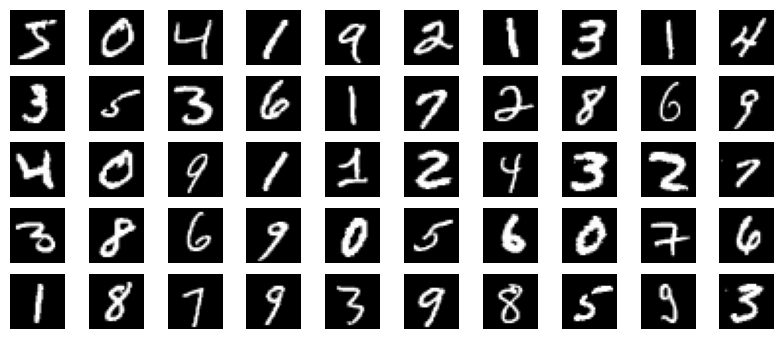

In [4]:
import matplotlib.pyplot as plt
# here show 50 first of this images

def show_images(num_images,X):
    #inputs dataset and number of images wants to show
    #output plot images
    plt.figure(figsize=(10,num_images//10))
    for index, (image, label) in enumerate(zip(X[0:num_images], y_train[0:num_images])):
        plt.subplot(num_images // 10 + 1, 10, index + 1)
        plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
        plt.axis('off')
show_images(50,x_train)

In [5]:
#TODO scale the data set to [0 1]
#divide data to maximum value .
x_train = x_train/255
x_test = x_test/255

در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [6]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
#calculate the covariance matrix
print(x_train.shape)
cov_mat = np.cov(x_train.T)
print(cov_mat.shape)
#calculate the eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

(60000, 784)
(784, 784)
Eigenvectors 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]

Eigenvalues 
[ 5.11687301e+00  3.74139084e+00  3.25270845e+00  2.84162070e+00
  2.56711774e+00  2.27366339e+00  1.72515498e+00  1.52056024e+00
  1.45630525e+00  1.24275009e+00  1.11208951e+00  1.06664054e+00
  9.04680833e-01  8.92181223e-01  8.32353048e-01  7.81900323e-01
  6.98386871e-01  6.73255811e-01  6.25995240e-01  6.07763020e-01
  5.62145880e-01  5.30798829e-01  5.02780255e-01  4.81147033e-01
  4.65783200e-01  4.42538691e-01  4.28439606e-01  4.14618707e-01
  3.92667337e-01  3.64261791e-01  3.46985958e-01  3.41741890e-01
  3.17734284e-01  3.09280821e-01  3.00549034e-01  2.86632712e-01
  2.66680512e-01  2.57227909e-01  2.53838022e-01  2.49006738e-01
  2.40823990e-01  2.34543854e-01  2.20658652e-01  2.09962678e-01
  2.02981381e-01  1.97776690e-01  1.90872477e-01  1.85379715e-01
  1.79298798

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [7]:
explained_variance = 0.7 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the eplained_variance of the total variance.
total_variance = sum(eig_vals)
sorted_eig_vals = np.sort(eig_vals)[::-1]
sorted_eig_vecs = eig_vecs[:, eig_vals.argsort()[::-1]]
explained_variance = 0.7
k = 0
for i in range(len(sorted_eig_vals)):
    if sum(sorted_eig_vals[:i])/total_variance >= explained_variance:
        k = i
        break
print(k)
#calculate the compression_ratio
compression_ratio = 0
compression_ratio = (x_train.shape[1] - k)/x_train.shape[1]
print(compression_ratio)

26
0.9668367346938775


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

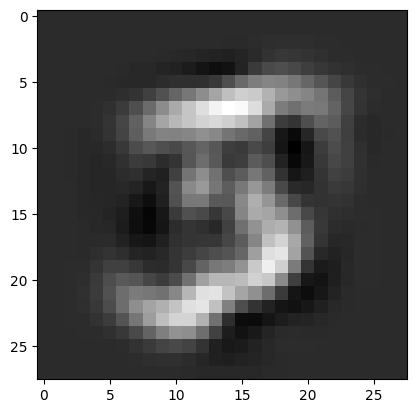

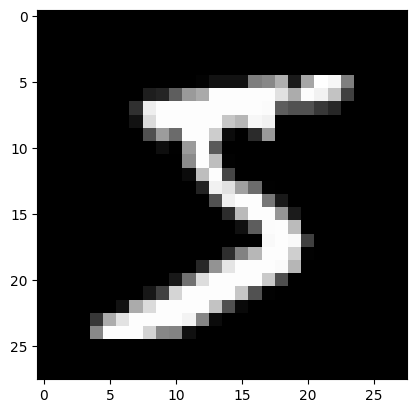

In [8]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image
V = sorted_eig_vecs[:, :k]
F = x_train.dot(V)
X_k = F.dot(V.T)
#plot the dimentionally reduced data
plt.imshow(np.reshape(X_k[0], (28,28)), cmap=plt.cm.gray)
plt.show()
#plot the original data
plt.imshow(np.reshape(x_train[0], (28,28)), cmap=plt.cm.gray)
plt.show()

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [58]:
#complete below function using python PCA function
# much slower than the sklearn version
def do_pca(n_components, data, data_test):
  #input number of component and normalized data set.
  #output is the projected dataset
  cov_mat = np.cov(data.T)
  eig_vals, eig_vecs = np.linalg.eig(cov_mat)
  sorted_eig_vecs = eig_vecs[:, eig_vals.argsort()[::-1]]
  V = sorted_eig_vecs[:, :n_components]
  F = data.dot(V)
  F_test = data_test.dot(V)
  X_k = F.dot(V.T)
  X_k_test = F_test.dot(V.T)
  return X_k, X_k_test

In [52]:
from sklearn.decomposition import PCA
#complete below function using sklearn PCA function
def do_pca(n_components, data, data_test):
  #input number of component and not normalized data set.
  #output is the projected dataset
  pca = PCA(n_components)
  pca.fit(data)
  return pca.transform(data), pca.transform(data_test)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

def ML_model(X, y, X_test, Y_test, print_output=True):
    #define ML model inputs dataset and lables
    #output accuracy of model on dataset
    # TODO
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X, y)
    acc = model.score(X, y)
    acc_test = model.score(X_test, Y_test)
    return acc, acc_test

In [55]:
from tqdm import trange
#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO
acc_list, acc_test_list, pc_list = [], [], []
for pc in trange(2,101):
    #TODO
    pc_list.append(pc)
    X, X_test = do_pca(pc, x_train, x_test)
    acc_train, acc_test = ML_model(X, y_train, X_test, y_test, print_output=False)
    acc_list.append(acc_train)
    acc_test_list.append(acc_test)


100%|██████████| 99/99 [23:47<00:00, 14.42s/it]


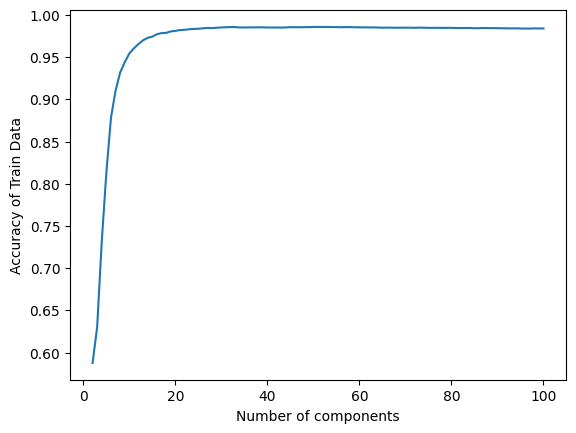

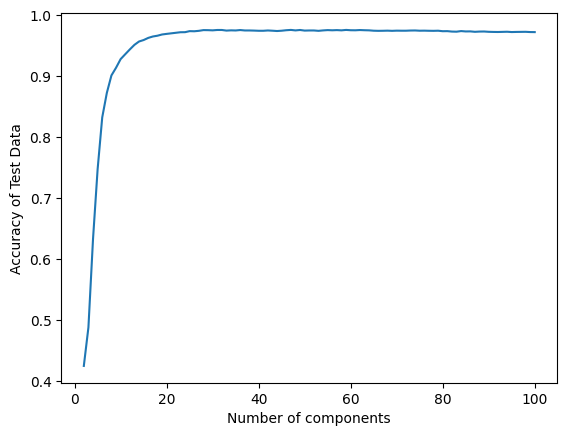

In [56]:
#plot the accuracy based on components.
#TODO
plt.plot(pc_list, acc_list)
plt.xlabel("Number of components")
plt.ylabel("Accuracy of Train Data")
plt.show()
plt.plot(pc_list, acc_test_list)
plt.xlabel("Number of components")
plt.ylabel("Accuracy of Test Data")
plt.show()

In [57]:
#print the number of components that maximize the accuracy and the max accuracy
#TODO
max_acc = max(acc_list)
max_pc = pc_list[acc_list.index(max_acc)]
print("Max accuracy of Train Data: ", max_acc)
print("Number of components: ", max_pc)
max_acc = max(acc_test_list)
max_pc = pc_list[acc_test_list.index(max_acc)]
print("Max accuracy of Test Data: ", max_acc)
print("Number of components: ", max_pc)

Max accuracy of Train Data:  0.9858666666666667
Number of components:  51
Max accuracy of Test Data:  0.9758
Number of components:  47
